In [9]:
class SVM:
  def __init__(self,learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def _init_weights_bias(self,X):
    n_features=X.shape[1]
    self.w=np.zeros(n_features)
    self.b=0

  def _get_cls_map(self,y):
    #if y=0 then map to -1
    return np.where(y <= 0,-1,1)

  def _satisfy_constraints(self, x, idx):
    linear_model=np.dot(x, self.w) + self.b
    return self.cls_map[idx]*linear_model >= 1

  def _get_gradients(self,constrain,x,idx):
    # if data point lies o the correct side
    if constrain:
      dw=self.lambda_param*self.w
      db=0
      return dw,db

    # if data point is on the wrong side
    dw=self.lambda_param*self.w-np.dot(self.cls_map[idx],x)
    db=-self.cls_map[idx]
    return dw, db

  def _update_weights_bias(self,dw,db):
    self.w -= self.lr * dw
    self.b -=self.lr * db

  def fit(self,X,y):
    #init weights & biases
    self._init_weights_bias(X)
    # map binary class to {-1,1}
    self.cls_map = self._get_cls_map(y)

    for _ in range(self.n_iters):
      for idx, x in enumerate(X):
        # check if dat apoint satisfies the constraint
        constrain = self._satisfy_constraints(x, idx)
        # compute the gradients accordingly
        dw, db = self._get_gradients(constrain, x, idx)
        #update weights & biases
        self._update_weights_bias(dw,db)

  def predict(self,X):
     estimate=np.dot(X,self.w) +self.b
      #compute the sign
     prediction=np.sign(estimate)
      # map class from {-1,1} to original values {0,1}
     return np.where(prediction == -1,0,1)





In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_blobs
import numpy as np


X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

clf=SVM(n_iters=1000)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

print("SVM Accuracy: ", accuracy(y_test,predictions))





SVM Accuracy:  1.0


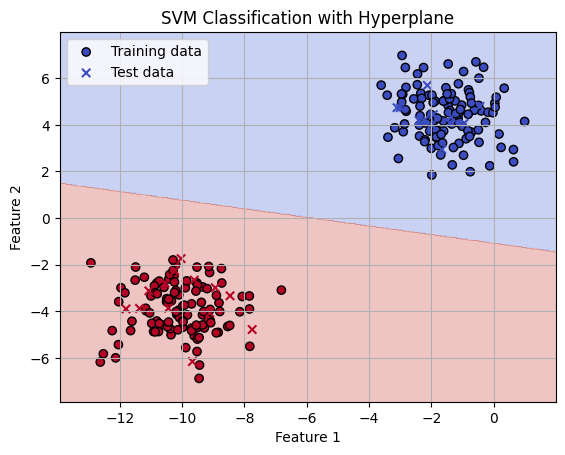

In [11]:
import matplotlib.pyplot as plt

# Create a meshgrid for plotting the decision boundary
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x0_min, x0_max, 500),
    np.linspace(x1_min, x1_max, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict values over the meshgrid
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, label="Training data", edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', label="Test data")

# Plot support vectors if available (optional, depends on how your SVM is implemented)
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title("SVM Classification with Hyperplane")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
